In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam


train_df = pd.read_csv("/workspaces/bakery-sales-prediction/0_DataPreparation/train_df.csv")
validation_df = pd.read_csv("/workspaces/bakery-sales-prediction/0_DataPreparation/validation_df.csv")

training_features = train_df.drop(columns=['Datum', "Umsatz"])
training_labels = train_df["Umsatz"]
validation_features = validation_df.drop(columns=['Datum', "Umsatz"])
validation_labels = validation_df["Umsatz"]

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


2024-12-19 14:38:04.849485: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 21)             │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 42 (168.00 B)

In [8]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 64260.7148 - val_loss: 46797.7852
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44283.5898 - val_loss: 13248.7861
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16103.7217 - val_loss: 10574.6270
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11394.2432 - val_loss: 8621.7119
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10403.6055 - val_loss: 7516.1699
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8534.6055 - val_loss: 6993.5088
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8078.6089 - val_loss: 6590.0776
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8666.0059 - val_loss: 6314.8774
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9747.7158 - val_loss: 5890.3081
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6684.3003 - val_loss: 5645.3037
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6394.8369 

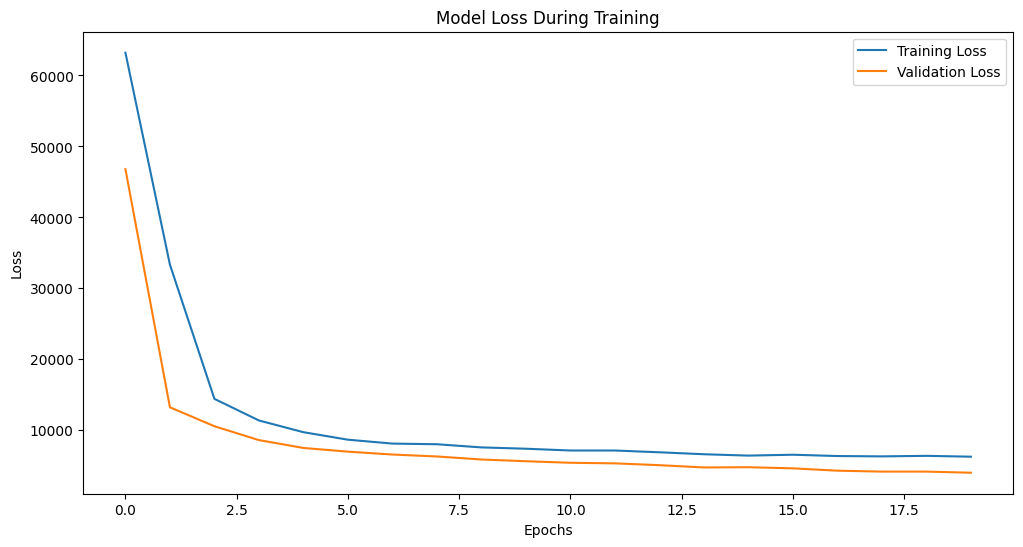

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
MAPE on the Training Data: 101.76%
MAPE on the Validation Data: 100.29%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


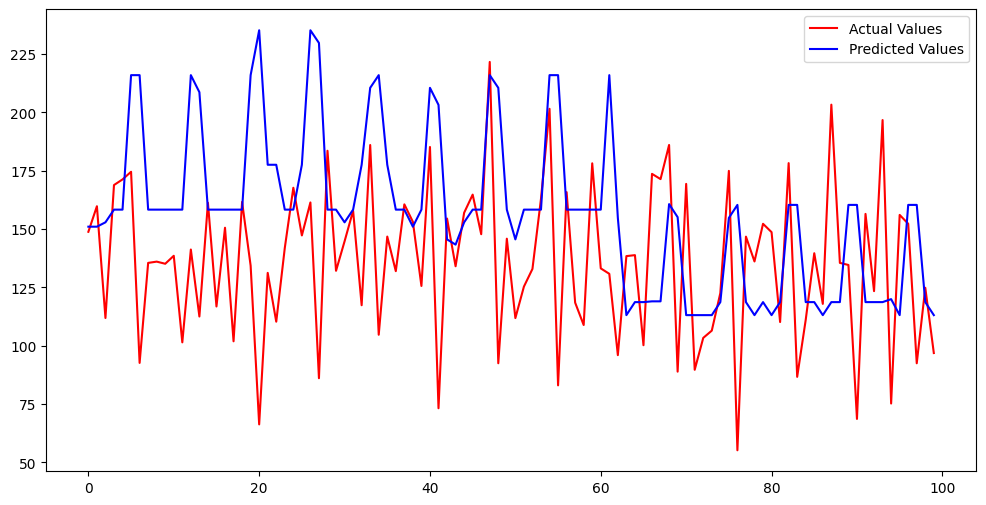

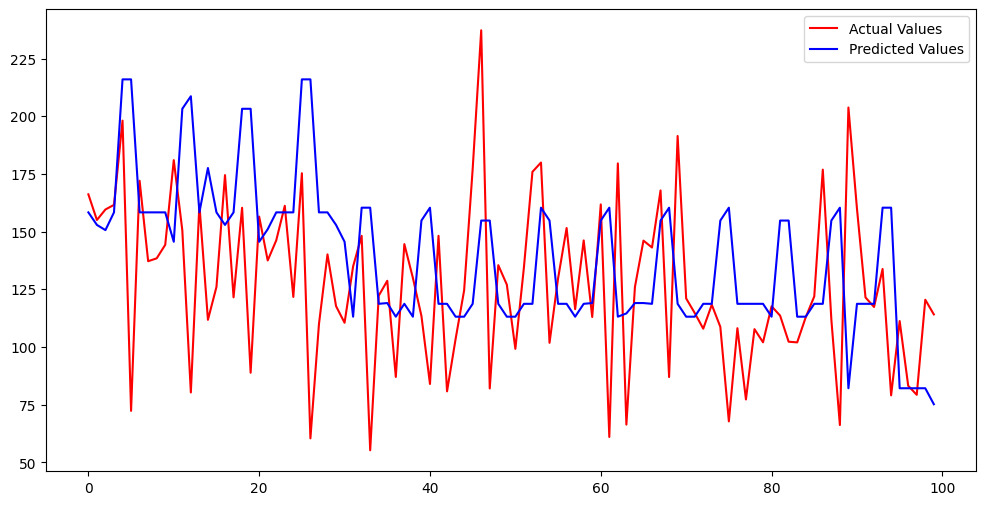

In [14]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

In [17]:
test_df = pd.read_csv("/workspaces/bakery-sales-prediction/0_DataPreparation/test_df.csv")

test_features = test_df.drop(columns=['id'])

predictions = model.predict(test_features)

test_df['Umsatz'] = predictions

submission_df = test_df[['id', 'Umsatz']]

submission_df.to_csv("submission.csv", index=False)

 1/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
